In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ama = pd.read_csv('Amazon Sale Report.csv')

In [3]:
ama

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [4]:
ama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [5]:
# 19 20 are totally empty remove them
# 18 has some null values 
# 13 14 15 16 has some missing or null values just check them
# ship-postal-code has data type just change them into int64
# change the date time datatype into daytime

In [6]:
ama.drop(['New', 'PendingS'], axis=1 , inplace = True)

In [7]:
ama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [8]:
ama.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [9]:
ama.shape

(128976, 19)

In [10]:
ama.dropna(inplace = True)

In [11]:
ama.shape

(37514, 19)

In [12]:
ama['ship-postal-code'] = ama['ship-postal-code'].astype(int)
ama.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               37514 non-null  int64  
 1   Order ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales Channel       37514 non-null  object 
 6   ship-service-level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier Status      37514 non-null  object 
 10  Qty                 37514 non-null  int64  
 11  currency            37514 non-null  object 
 12  Amount              37514 non-null  float64
 13  ship-city           37514 non-null  object 
 14  ship-state          37514 non-null  object 
 15  ship-postal-code    37514 non-null  int32  
 16  ship-cou

In [13]:
ama['Date'] = pd.to_datetime(ama['Date'])
ama.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object        

C:\Users\Asus\AppData\Local\Temp\ipykernel_19320\501291242.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ama['Date'] = pd.to_datetime(ama['Date'])


In [14]:
ama['DAYS'] =ama['Date'].dt.day_name()
ama['MONTHS'] = ama['Date'].dt.month_name()
ama['YEAR'] = ama['Date'].dt.year

In [15]:
ama.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,DAYS,MONTHS,YEAR
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship,Saturday,April,2022
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship,Saturday,April,2022
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship,Saturday,April,2022
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship,Saturday,April,2022
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,...,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship,Saturday,April,2022


In [16]:
ama.describe(include = 'object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by,DAYS,MONTHS
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1,7,4
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship,Sunday,April
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514,5852,15091


C:\Users\Asus\AppData\Local\Temp\ipykernel_19320\187044975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Size', data = ama , palette='viridis')


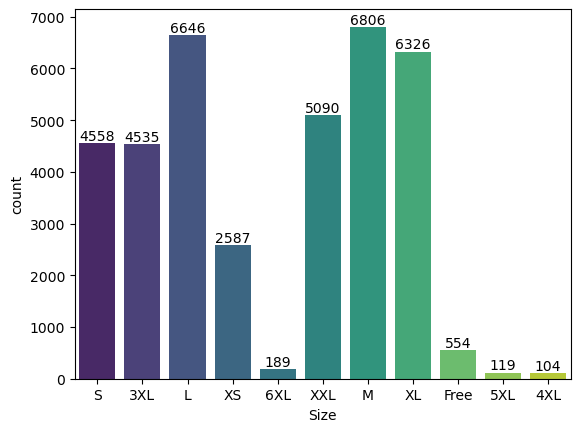

In [17]:
### size

ax = sns.countplot(x = 'Size', data = ama , palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)

# most of the order are M size

In [18]:
ama.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,DAYS,MONTHS,YEAR
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship,Saturday,April,2022
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship,Saturday,April,2022


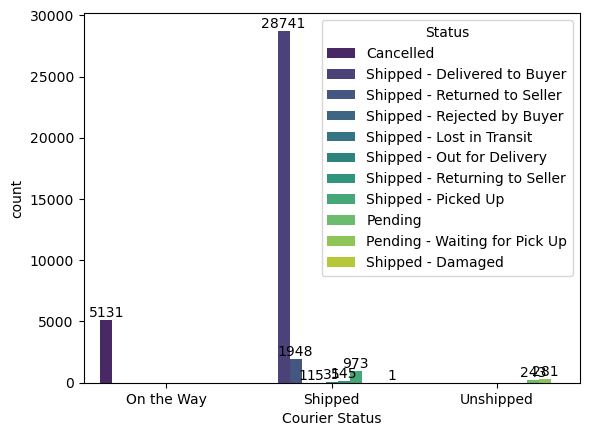

In [19]:
ax = sns.countplot(x = 'Courier Status' , data = ama , palette = 'viridis' , hue = 'Status')
for bars in ax.containers:
    ax.bar_label(bars)

# from graph most of order ->  shipped are delivered to buyer

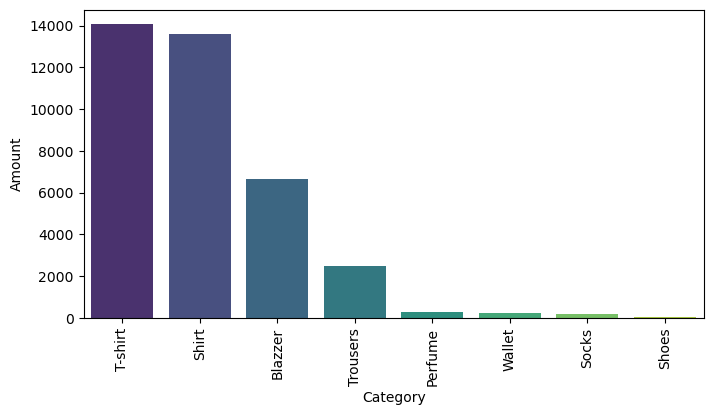

In [20]:
plt.figure(figsize= (8,4))
ct = ama.groupby('Category')['Amount'].count().sort_values(ascending=False).reset_index()
sns.barplot(data=ct, x='Category', y='Amount', palette = 'viridis' , hue = 'Category')
plt.xticks(rotation=90)
plt.show()

# most of the customer are buy t-shirt

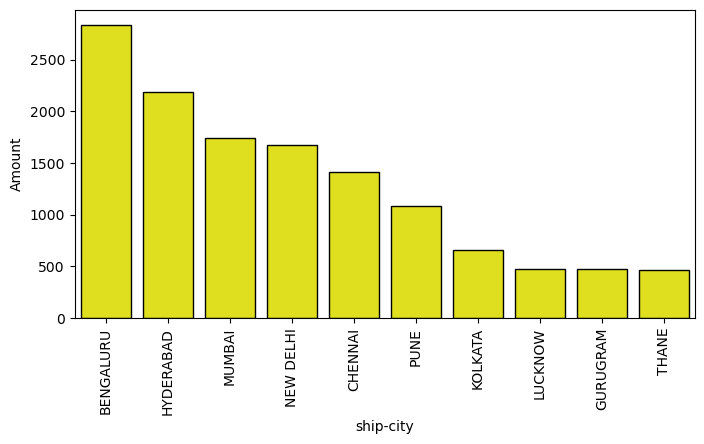

In [21]:
s_city = ama.groupby('ship-city')['Amount'].count().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize=(8,4))
sns.barplot(data = s_city, x = 'ship-city' , y ='Amount' , color = 'yellow' , edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()

# most of customer product are shiped from bengaluru

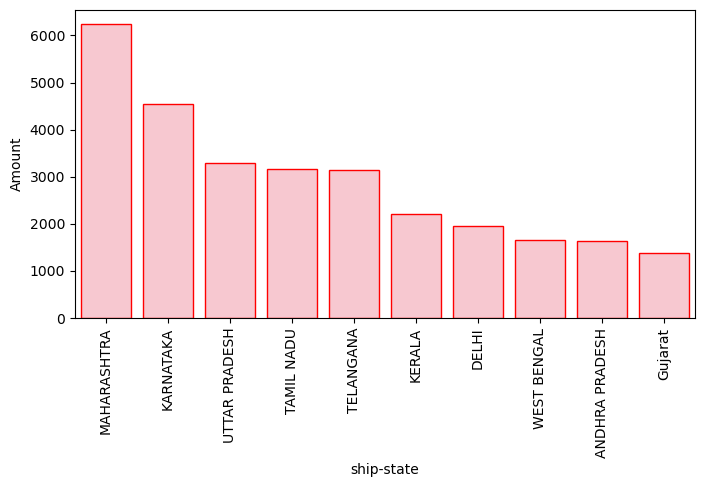

In [22]:
s_city = ama.groupby('ship-state')['Amount'].count().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize=(8,4))
sns.barplot(data = s_city, x = 'ship-state' , y ='Amount' , color = 'pink' , edgecolor = 'red')
plt.xticks(rotation = 90)
plt.show()

# most of customer product are shiped from MAHARASHTRA

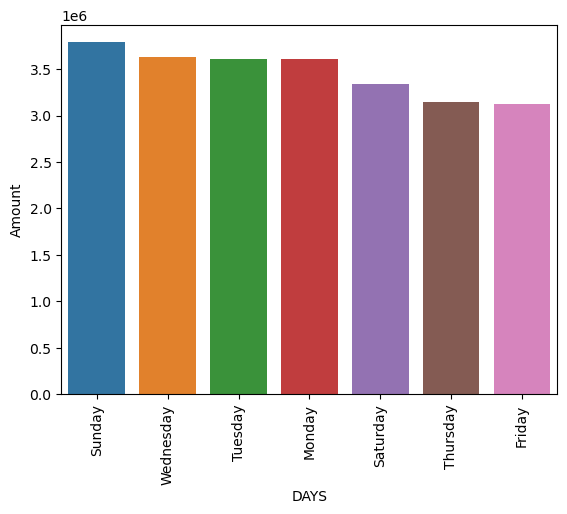

In [23]:
days = ama.groupby('DAYS')['Amount'].sum().sort_values(ascending = False).reset_index()
sns.barplot(data = days, x = 'DAYS', y = 'Amount' , hue = 'DAYS')
plt.xticks(rotation = 90)
plt.show()

# most of the product are order on sunday 

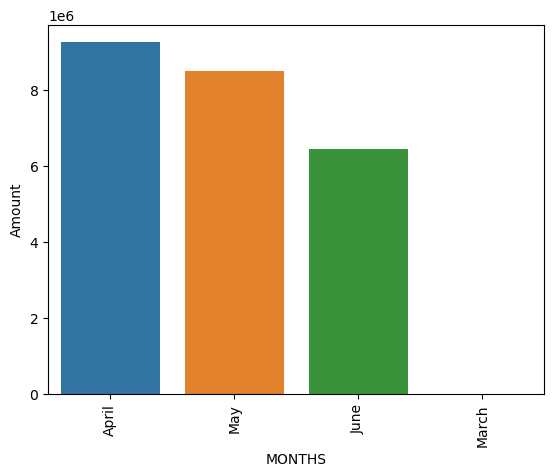

In [24]:
months= ama.groupby('MONTHS')['Amount'].sum().sort_values(ascending = False).reset_index()
sns.barplot(data = months, x = 'MONTHS', y = 'Amount' , hue = 'MONTHS')
plt.xticks(rotation = 90)
plt.show()

# most of order are placed in the month of -> APRIL

Text(0.5, 1.0, 'Available size')

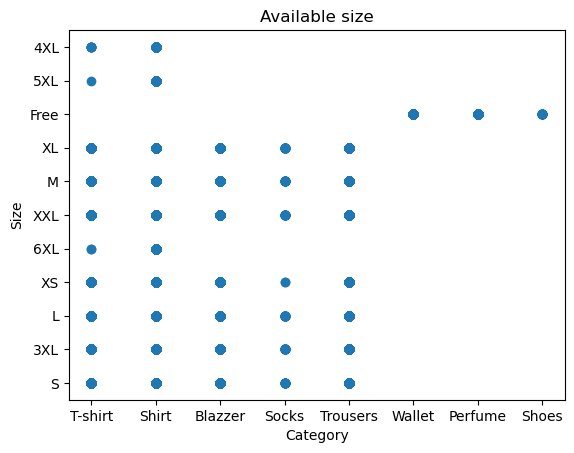

In [25]:
# scatter plot
x_data = ama['Category']
y_data = ama['Size']
plt.scatter(x_data , y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Available size')

# conclusion

# from the give amazon data set 
## 1. most of the order are M size
## 2. most of the customer are buy t-shirt.
## 3. from graph most of order -> shipped are delivered to buyer
## 4. most of customer product are shiped from bengaluru
## 5. most of customer product are shiped from MAHARASHTRA
## 6. most of the product are order on sunday
## 7. most of order are placed in the month of -> APRIL